In [1]:
#import the functions from figurestyle.py which is outside the folder   
import sys
sys.path.append('..')
from figurestyle import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
# create a function that load the data
def load_data(filename):
    data = np.loadtxt(filename) #load the data
    data = data[:,0:2] #only take the first two columns
    data[:,0] = data[:,0] + 1 #start from the first eigenmode
    data[:,1] = data[:,1]*1e9 #convert to Hz
    return data

In [11]:
# load the data
data_junctions_76 = load_data('test_one_array_76.eig')
data_junctions_370 = load_data('test_one_array_370.eig')

In [9]:
plasma_frequency = 17.9e9 #Hz
Elj = 40e9 #Hz

h = 6.62607015e-34
e = 1.602e-19
phi_0 = h/2/e

junction_inductance = (phi_0/2/np.pi)**2/(Elj*h)
junction_capacitance = 1/(2*np.pi*plasma_frequency)**2/junction_inductance

In [16]:
Cj = junction_capacitance
f0 = plasma_frequency

def frequency_vs_modes(x,N, Cg):
    return f0*np.sqrt((1-np.cos(np.pi*x/N))/(np.abs(Cg)/2/Cj + 1-np.cos(np.pi*x/N)))

def frequency_vs_modes_2fit_N_76(x,Cg):
    return frequency_vs_modes(x,76,Cg)

def frequency_vs_modes_2fit_N_370(x,Cg):
    return frequency_vs_modes(x,370,Cg)

In [17]:
# fit the datas with 76 and 370 junctions
popt_76, pcov_76 = curve_fit(frequency_vs_modes_2fit_N_76, data_junctions_76[:,0], data_junctions_76[:,1])
popt_370, pcov_370 = curve_fit(frequency_vs_modes_2fit_N_370, data_junctions_370[:,0], data_junctions_370[:,1])

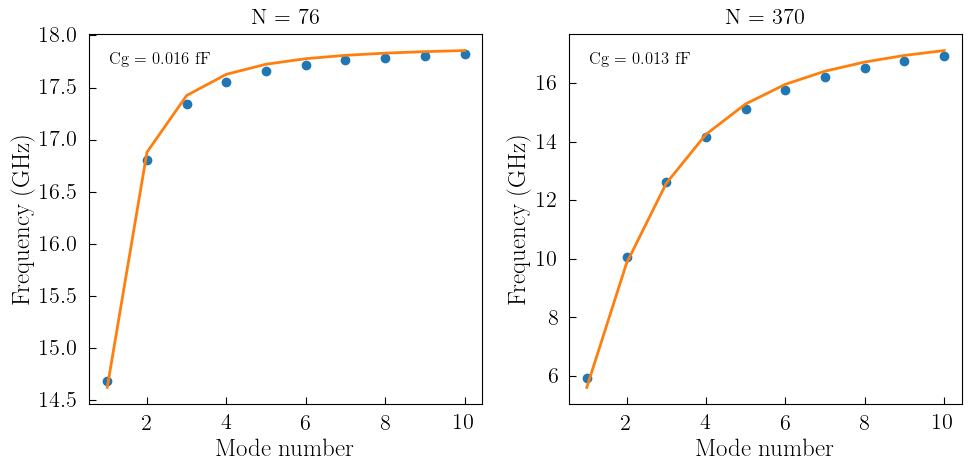

In [36]:
# plot the datas and the fit with 76 and 370 junctions in two different figures
figure_features()
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data_junctions_76[:,0], data_junctions_76[:,1]*1e-9, 'o', label='76 junctions')
ax[0].plot(data_junctions_76[:,0], frequency_vs_modes_2fit_N_76(data_junctions_76[:,0],*popt_76)*1e-9, label='76 junctions fit')
ax[1].plot(data_junctions_370[:,0], data_junctions_370[:,1]*1e-9, 'o', label='370 junctions')
ax[1].plot(data_junctions_370[:,0], frequency_vs_modes_2fit_N_370(data_junctions_370[:,0],*popt_370)*1e-9, label='370 junctions fit')
ax[0].set_xlabel('Mode number')
ax[1].set_xlabel('Mode number')
ax[0].set_ylabel('Frequency (GHz)')
ax[1].set_ylabel('Frequency (GHz)')

ax[0].set_title('N = 76')
ax[1].set_title('N = 370')
plt.tight_layout()

#Write the fit parameters in the figure
ax[0].text(0.05, 0.95, 'Cg = {:.3f} fF'.format(popt_76[0]*1e15), transform=ax[0].transAxes, fontsize=12, verticalalignment='top')
ax[1].text(0.05, 0.95, 'Cg = {:.3f} fF'.format(popt_370[0]*1e15), transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

plt.show()

